**Importing all the necessary Libraries for the task**

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import seaborn as sns
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM

Starting part of the Preprocessing phase(the other part was done using MS Excel)

Importing the data file in CSV format

In [5]:
#the variable data_ad holds the dataframe for Adamawa state data
cross_river = pd.read_csv('data_cross_river.csv')
print(data_ad.shape)

(22, 12)


In [6]:
print (cross_river.isnull().sum())

Year             0
s_pressure       0
av_temp          0
sp_humidity      0
re_humidity      0
w_speed          0
t_max            0
t_min            0
precipitation    0
all_sky_par      0
cl_sky_par       0
yield            0
dtype: int64


Viewing the data

In [7]:
cross_river.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           22 non-null     int64  
 1   s_pressure     22 non-null     float64
 2   av_temp        22 non-null     float64
 3   sp_humidity    22 non-null     float64
 4   re_humidity    22 non-null     float64
 5   w_speed        22 non-null     float64
 6   t_max          22 non-null     float64
 7   t_min          22 non-null     float64
 8   precipitation  22 non-null     float64
 9   all_sky_par    22 non-null     float64
 10  cl_sky_par     22 non-null     float64
 11  yield          22 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 2.2 KB


Visualizing the data using pair plots

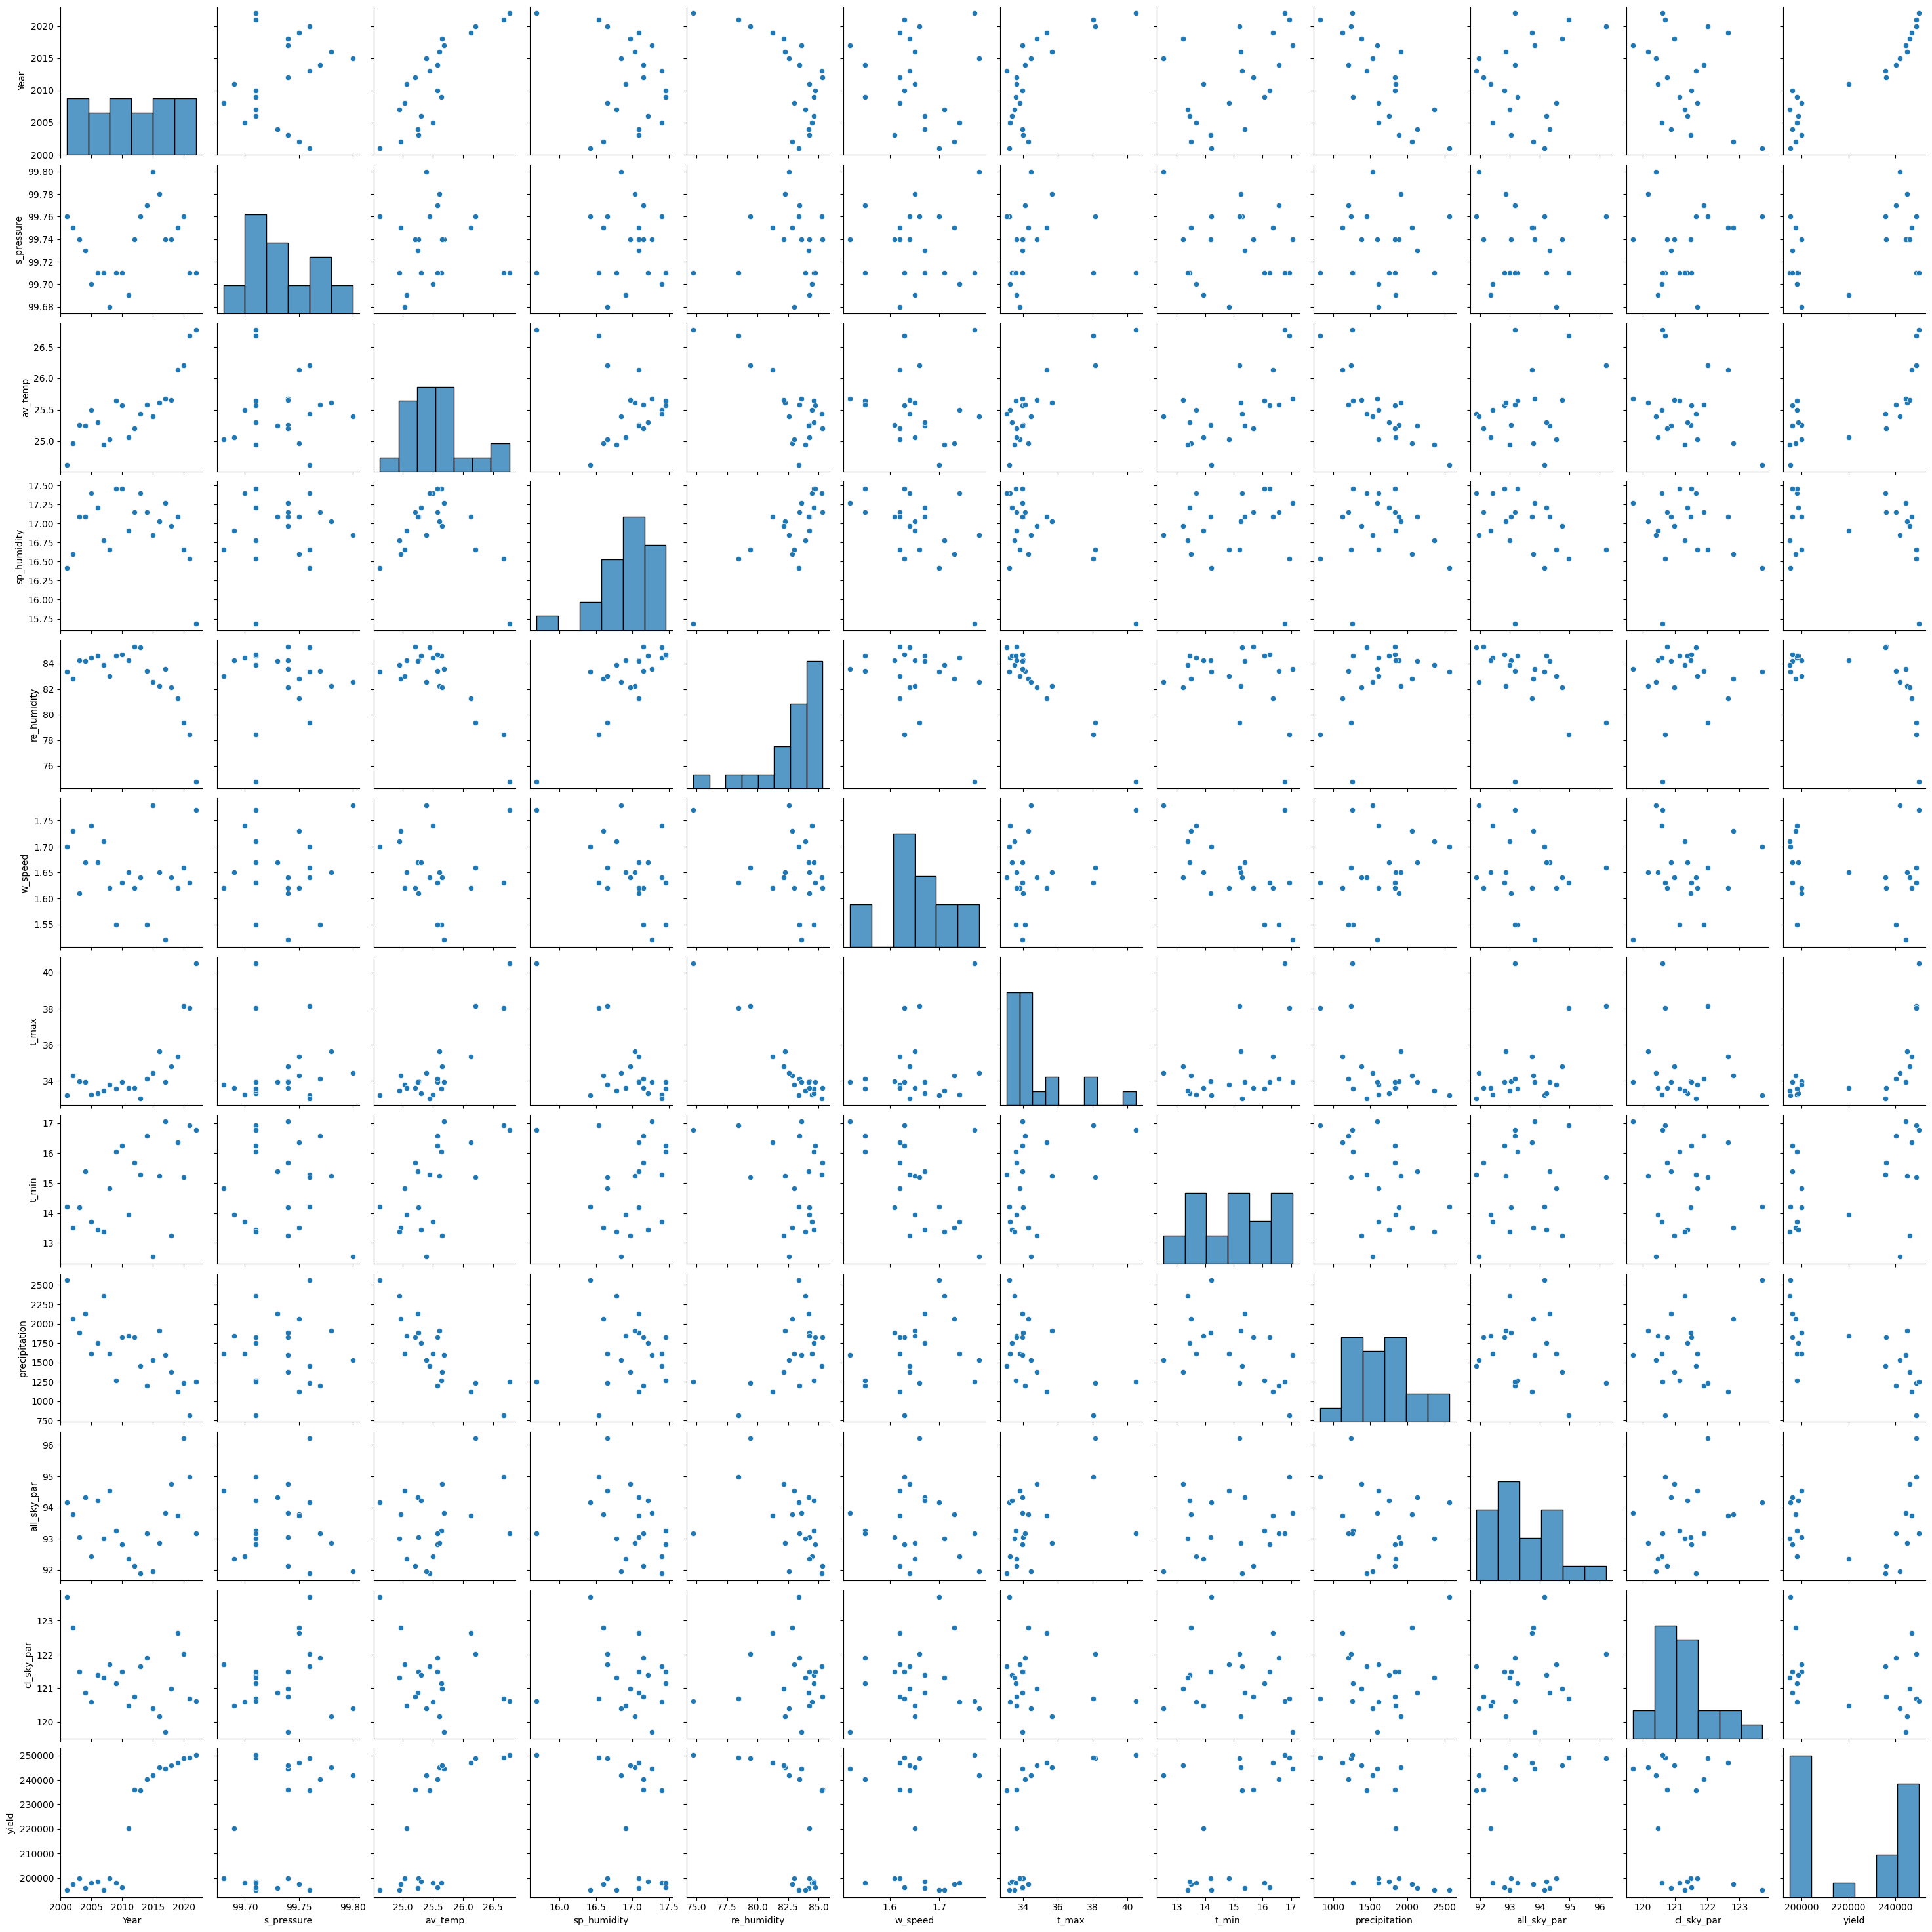

In [5]:
sns.pairplot(cross_river)

Using boxplots to view outliers

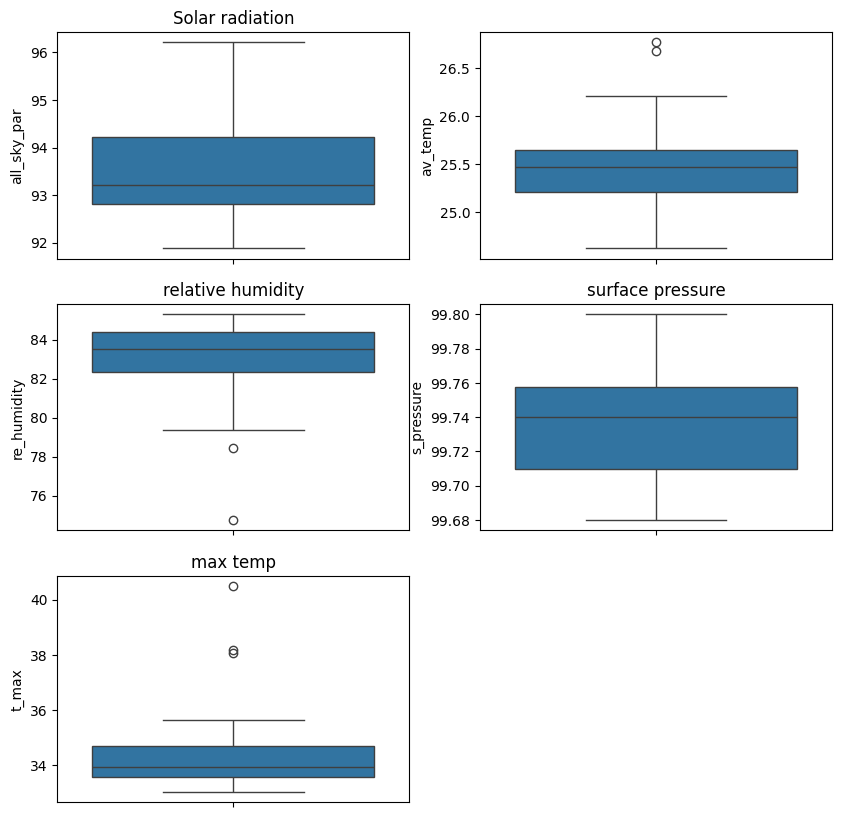

In [6]:
plt.figure(figsize = (10,10))

plt.subplot(3,2,1)
sns.boxplot(data= cross_river['all_sky_par'])
plt.title('Solar radiation')


plt.subplot(3,2,2)
sns.boxplot(data= cross_river['av_temp'])
plt.title('')

plt.subplot(3,2,3)
sns.boxplot(data= cross_river['re_humidity'])
plt.title('relative humidity')

plt.subplot(3,2,4)
sns.boxplot(data= cross_river['s_pressure'])
plt.title('surface pressure')

plt.subplot(3,2,5)
sns.boxplot(data= cross_river['t_max'])
plt.title('max temp')

plt.show()


Line plots for some variables

In [ ]:
cross_river["yield"].plot(kind="line", figsize=(5, 3))
plt.xlabel("Year")
plt.ylabel("Rice Yield")
plt.title("Rice Yield Over Time")
plt.show()
cross_river["s_pressure"].plot(kind="line", figsize=(5, 3))
plt.xlabel("Year")
plt.ylabel("s_pressure")
plt.title("s_pressure Over Time")
plt.show()

cross_river["w_speed"].plot(kind="line", figsize=(5, 3))
plt.xlabel("Year")
plt.ylabel("w_speed")
plt.title("s_pressure Over Time")
plt.show()

cross_river["av_temp"].plot(kind="line", figsize=(5, 3))
plt.xlabel("Year")
plt.ylabel("av_temp")
plt.title("s_pressure Over Time")
plt.show()

cross_river["all_sky_par"].plot(kind="line", figsize=(5, 3))
plt.xlabel("Year")
plt.ylabel("all_sky_par")
plt.title("s_pressure Over Time")
plt.show()

cross_river["t_max"].plot(kind="line", figsize=(5, 3))
plt.xlabel("Year")
plt.ylabel("t_max")
plt.title("s_pressure Over Time")
plt.show()

To view the Correlation matrix for selected variables

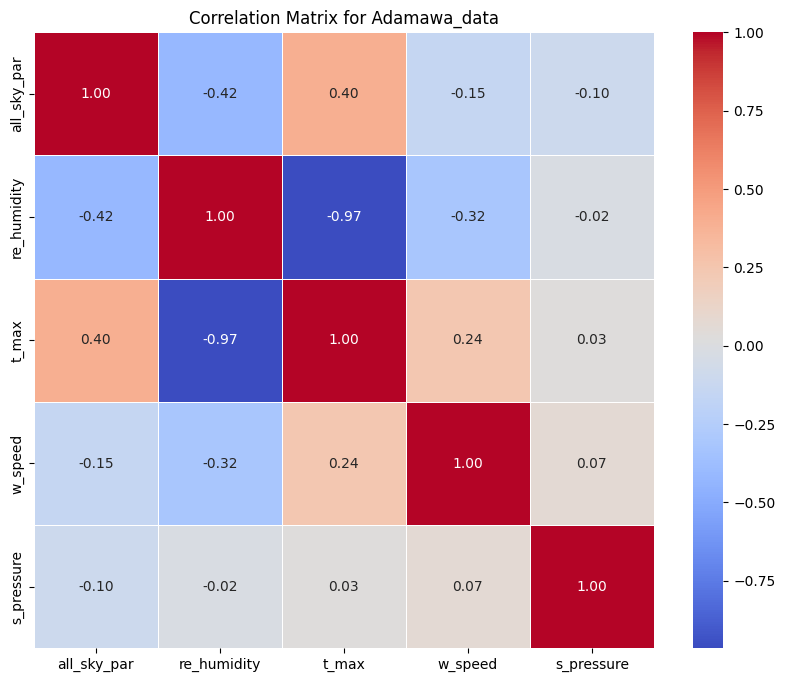

In [7]:
correlation_matrix = cross_river[['all_sky_par', 're_humidity', 't_max', 'w_speed', 's_pressure']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Adamawa_data')
plt.show()

In [8]:
#converting year column to date and index
cross_river['Year'] = pd.to_datetime(cross_river['Year'], format='%Y')
cross_river.set_index(cross_river['Year'].dt.strftime('%Y'), inplace=True)

In [9]:
#seperating features from target variable
#X = cross_river.drop(['yield'], axis=1)  # Features
X = cross_river[['all_sky_par', 're_humidity', 't_max', 'w_speed', 's_pressure']]
#X = cross_river.drop(['yield'], axis=1)
y = cross_river['yield']
#scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# spliting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=247)

In [10]:
X_train #cross river

array([[-1.05106523,  0.57515856, -0.55300299, -0.04153866, -1.46482902],
       [ 2.56197149, -1.40882367,  1.89635979,  0.11076976,  0.86077582],
       [ 0.32845788,  0.29406046, -0.37535689, -2.02154803,  0.19631729],
       [ 0.24399729, -0.64700708,  0.38367641, -0.4984639 ,  0.52854655],
       [-1.50152176,  0.98254711, -0.86522945, -0.19384707,  0.86077582],
       [-0.98537365,  0.65256238, -0.75756515,  1.32923706, -1.13259976],
       [-0.41291848,  0.57515856, -0.35382403, -0.65077231,  0.19631729],
       [ 0.63814675,  0.22073052, -0.7737148 ,  0.72000341,  0.86077582],
       [ 0.99475816,  0.06592287, -0.4507219 , -0.4984639 , -1.79705828],
       [ 0.78829892,  0.55071525, -0.37535689,  0.26307817, -0.13591197],
       [-0.30030435, -3.29503264,  3.15603208,  1.7861623 , -0.8003705 ],
       [-0.21584375,  0.72589232, -0.57453584, -1.56462279, -0.8003705 ],
       [-0.62876223,  0.75440952, -0.37535689, -0.34615548, -0.8003705 ],
       [-0.29091984,  0.24517383, -0.2

**Training the Linear Regressor**

In [12]:
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the testing set
pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, pred)
print("Mean Squared Error:", mse)

#Creating a dataframe 'Model_perf' to tabulate the values for each of the matrices used
Model_perf = pd.DataFrame(columns=['Model_Name','MSE','R2_Score', 'MAE', 'RMSE', 'MAPE'])

#Evaluating the model
LR_mse = mean_squared_error(y_test, pred)
LR_R2 = r2_score(y_test, pred)
LR_mae = mean_absolute_error(y_test, pred)
LR_rmse = sqrt(LR_mse)
LR_mape = calculateMape(y_test, pred)

#Adding a row for the evaluation of Linear regression model
new_row = {'Model_Name':'Linear Regression','MSE':LR_mse , 'R2_Score': LR_R2, 'MAE' : LR_mae, 'RMSE' :LR_rmse, 'MAPE':LR_mape}
Model_perf.loc[0] = new_row

Mean Squared Error: 47191376.35979064


In [13]:
print(r2_score(y_test, pred))

0.9175109189358386


In [ ]:
##comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
##print(comparison_df.head())

**Training Polynomial Regressor**

In [14]:
# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)

# Train the polynomial regression model
poly_regression = LinearRegression()
poly_regression.fit(X_poly, y_train)

# Predict using the trained model(testing the model)
X_test_poly = poly_features.transform(X_test)
y_pred = poly_regression.predict(X_test_poly)
print("Predicted values:", y_pred)

#Evaluating the model
PR_mse = mean_squared_error(y_test,y_pred)
PR_R2 = r2_score(y_test,y_pred)
PR_mae = mean_absolute_error(y_test, y_pred)
PR_rmse = sqrt(PR_mse)
PR_mape = calculateMape(y_test, y_pred)

#Adding a row to the Model_perf table for Polynomial regression evaluation
new_row2 = {'Model_Name':'Polynomial Regression','MSE':PR_mse , 'R2_Score': PR_R2, 'MAE' :PR_mae, 'RMSE' :PR_rmse, 'MAPE':PR_mape}
Model_perf.loc[1] = new_row2


Predicted values: [252402.15007172 173608.37816786 343138.77426498 180683.23553192
 175438.32017539]


**Training the Decision tree**

In [15]:
# Training the model
rice_tree_model = DecisionTreeRegressor(random_state=1)
rice_tree_model.fit(X_train,y_train)

#Testing the Model
prediction = rice_tree_model.predict(X_test)

#Evaluating the Model
DT_mse = mean_squared_error(y_test,prediction)
DT_R2 = r2_score(y_test,prediction)
DT_mae = mean_absolute_error(y_test, prediction)
DT_rmse = mean_squared_error(y_test, prediction, squared=False)
DT_mape = calculateMape(y_test, prediction)

#Adding the new row to the Model_perf table for Decision tree evaluation
new_row3 = {'Model_Name':'Decision Tree','MSE':DT_mse , 'R2_Score': DT_R2, 'MAE' :DT_mae, 'RMSE' :DT_rmse, 'MAPE':DT_mape}
Model_perf.loc[2] = new_row3

**Training the Random forests regressor**

In [16]:
#Model training
rice_forest_model = RandomForestRegressor(n_estimators=50, random_state=42)

#y_train = y_train.ravel()

rice_forest_model.fit(X_train,y_train)

#Model testing
predicted_values = rice_forest_model.predict(X_test)

#Evaluating the model
RF_mse = mean_squared_error(y_test,predicted_values)
RF_R2 = r2_score(y_test, predicted_values)
RF_mae = mean_absolute_error(y_test, predicted_values)
RF_rmse = mean_squared_error(y_test, predicted_values, squared=False)
RF_mape = calculateMape(y_test, predicted_values)

#Adding the new row to the Model_perf table for Random forests evaluation
new_row4 = {'Model_Name':'Random Forests','MSE':RF_mse , 'R2_Score': RF_R2, 'MAE' :RF_mae, 'RMSE' :RF_rmse, 'MAPE':RF_mape}
Model_perf.loc[3] = new_row4


**Training the Support Vector Regressor**

In [17]:
#Model training
svr_model = SVR(kernel='rbf', C=0.1, gamma=10)  # Choosing the appropriate kernel ( 'linear', 'rbf', 'poly', etc.)
svr_model.fit(X_train, y_train)

#Model testing
predicted = svr_model.predict(X_test)

#Model evaluation
SVR_mse = mean_squared_error(y_test,predicted)
SVR_R2 = r2_score(y_test,predicted)
SVR_mae = mean_absolute_error(y_test, predicted)
SVR_rmse = sqrt(SVR_mse)
SVR_mape = calculateMape(y_test, predicted)

#Adding a new row for SVR to the Model_perf table
new_row5 = {'Model_Name':'Support Vector Regression','MSE':SVR_mse , 'R2_Score': SVR_R2, 'MAE' :SVR_mae, 'RMSE' :SVR_rmse, 'MAPE':SVR_mape}
Model_perf.loc[4] = new_row5


**Building LSTM**

In [18]:
# Spliting data into training, validation, and tests sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% for testing
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)  # Split train data further for validation (25% of training data)

# Building the model and its layers
model = keras.Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(5, 1)))  # First LSTM layer
model.add(LSTM(units=32))  # Second LSTM layer
model.add(Dense(units=1))  # Output layer for regression

# Compiling the model
model.compile(loss="mse", optimizer="adam", metrics=['mae'])

# Defining train_data and val_data
train_data = (X_train, y_train)
val_data = (X_val, y_val)
test_data = (X_test, y_test)

# Training the model
model.fit(train_data[0], train_data[1], epochs=10, validation_data=val_data)  # Adjust epochs as needed

# Testing the model on test data
loss, mae = model.evaluate(test_data[0], test_data[1])
print(f"Test Loss: {loss:.4f}, Mean Absolute Error: {mae:.4f}")

# Make predictions on new data (optional)
predictor = model.predict(X_test)

# Model Evaluation
LSTM_mse = mean_squared_error(y_test,predictor)
LSTM_R2 = r2_score(y_test,predictor)
LSTM_mae = mean_absolute_error(y_test, predictor)
LSTM_rmse = mean_squared_error(y_test, predictor, squared=False)
LSTM_mape = calculateMape(y_test, predictor)

#Adding a new row to the Model evaluation table
new_row6 = {'Model_Name':'LSTM','MSE':LSTM_mse , 'R2_Score': LSTM_R2, 'MAE' :LSTM_mae, 'RMSE' :LSTM_rmse, 'MAPE':LSTM_mape}
Model_perf.loc[5] = new_row6



Epoch 1/10
1/1 [==============================] - 14s 14s/step - loss: 48905273344.0000 - mae: 220049.1094 - val_loss: 55959990272.0000 - val_mae: 235587.1875
Epoch 2/10
1/1 [==============================] - 0s 91ms/step - loss: 48905216000.0000 - mae: 220049.0000 - val_loss: 55959928832.0000 - val_mae: 235587.0625
Epoch 3/10
1/1 [==============================] - 0s 89ms/step - loss: 48905162752.0000 - mae: 220048.8594 - val_loss: 55959879680.0000 - val_mae: 235586.9531
Epoch 4/10
1/1 [==============================] - 0s 94ms/step - loss: 48905109504.0000 - mae: 220048.7656 - val_loss: 55959818240.0000 - val_mae: 235586.8281
Epoch 5/10
1/1 [==============================] - 0s 96ms/step - loss: 48905060352.0000 - mae: 220048.6406 - val_loss: 55959756800.0000 - val_mae: 235586.7031
Epoch 6/10
1/1 [==============================] - 0s 89ms/step - loss: 48905003008.0000 - mae: 220048.5156 - val_loss: 55959699456.0000 - val_mae: 235586.5781
Epoch 7/10
1/1 [==============================

In [19]:
Model_perf

,Model_Name,MSE,R2_Score,MAE,RMSE,MAPE
0,Linear Regression,4.719138e+07,0.917511,5693.183176,6869.597977,2.495869
1,Polynomial Regression,3.188555e+09,-4.573497,44272.198092,56467.291456,18.972183
2,Decision Tree,3.887149e+08,0.320538,9747.800000,19715.854640,4.092578
3,Random Forests,1.274798e+08,0.777169,9087.848000,11290.693672,3.858125
4,Support Vector Regression,6.053853e+08,-0.058195,24461.999912,24604.578759,10.907300
5,LSTM,4.681415e+10,-91.935379,215198.569524,216365.783707,99.999328


In [11]:
#A funtion for calculating the MAPE value
def calculateMape(test_y, pred_y):
    # Convert to NumPy array for element-wise operations
    test_y = np.array(test_y)
    pred_y = np.array(pred_y)

    # Calculate absolute percentage errors
    absolute_percentage_errors = np.abs((test_y - pred_y) / test_y)

    # Replace any potential division by zero with NaN
    absolute_percentage_errors[np.isnan(absolute_percentage_errors)] = 0

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = np.mean(absolute_percentage_errors) * 100

    return mape

"XGBoost Regressor"

In [ ]:
### Trying the XGB regressor now

from xgboost import XGBRegressor
XG_boost = XGBRegressor(max_depth = 3,n_estimators = 300 )

XG_boost.fit(X_train , y_train)
y_pred = XG_boost.predict(X_test)
XG_rmse = mean_squared_error(y_test,y_pred)
XG_R2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

new_row = {'Model_Name':'Linear Regression','MSE':LR_mse , 'R2_Score': LR_R2, 'MAE' :mae, 'RMSE' :rmse}
Model_perf = Model_perf.append(new_row,ignore_index = True)

C:\Users\Joey\AppData\Local\Temp\ipykernel_9140\1471169558.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_perf = Model_perf.append(new_row,ignore_index = True)


Feature selection using f-Regression

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Create a feature selector
fs = SelectKBest(score_func=f_regression, k=5)

# Fit the feature selector to the data
fs.fit(X_train, y_train)

# Get the selected feature names
selected_features = X_train.columns[fs.get_support()]
print("Selected Features:", selected_features)

Feature selection using Random forest

In [ ]:
rf = RandomForestRegressor(random_state=42)
rfe = RFE(estimator=rf, n_features_to_select= 7, step=1)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Parameter Tunning for DecisionTreeRegressor using grid search cross-validation

In [ ]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 15, 20, 35, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Create the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and the best model
best_params_dt = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_

# Use the best model for predictions
y_pred_dt = best_dt_model.predict(X_test)

# Evaluate the performance
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Best Decision Tree Model Mean Squared Error: {mse_dt}')
print(f'Best Parameters: {best_params_dt}')

Parameter tunning for Random forest using grid search cross-validation

In [ ]:

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Use the best model for predictions
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Best Random Forest Model Mean Squared Error: {mse_rf}')
print(f'Best Parameters: {best_params}')

Parameter Tunning for SVR using Grid search cross validation

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
grid_search = GridSearchCV(estimator=SVR(kernel='linear'), param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_svr_model = grid_search.best_estimator_

In [ ]:
print(best_params)
print(best_svr_model)